In [10]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
listings = pd.read_csv("listings.csv")
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,60,3,278,2019-11-21,2.90,1,137
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-03-27,3.73,2,0
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,100,14,5,2020-01-02,0.12,1,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,138,2,221,2020-07-25,2.17,1,217
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,338,2020-02-06,4.52,2,298


In [15]:
# data cleaning
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(0)
listings.drop(['neighbourhood_group'], inplace=True, axis=1)
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1
listings = listings[~((listings['price'] < (Q1 - 1.5 * IQR)) |(listings['price'] > (Q3 + 1.5 * IQR)))]
# listings['lat']

Text(0, 0.5, 'Price')

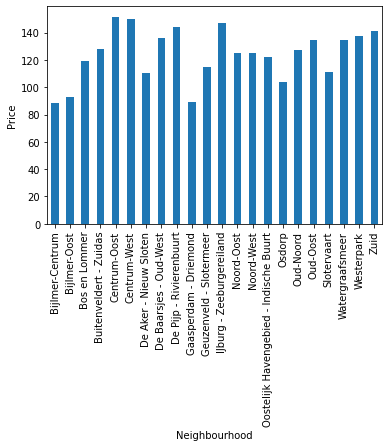

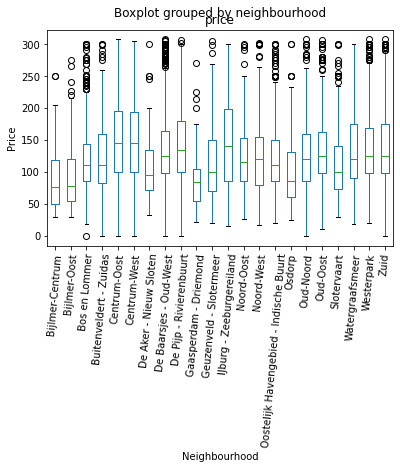

In [28]:
listings.groupby('neighbourhood')['price'].mean().plot.bar()
plt.xlabel("Neighbourhood")
plt.ylabel("Price")

listings[['neighbourhood', 'price']].boxplot(by = 'neighbourhood', rot = 85, grid = False, )
plt.xlabel("Neighbourhood")
plt.ylabel("Price")

(0.0, 400.0)

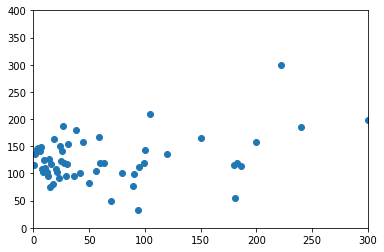

In [17]:
pricings = listings.groupby('minimum_nights')['price'].mean()

plt.scatter(pricings.index, pricings)
plt.xlim(0,300)
plt.ylim(0,400)

Text(0, 0.5, 'Price')

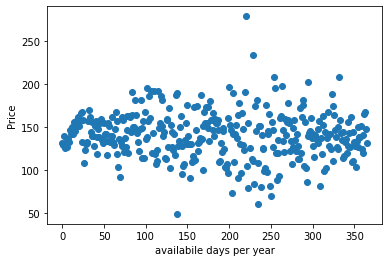

In [25]:
pricings = listings.groupby('availability_365')['price'].mean()

plt.scatter(pricings.index, pricings)
plt.xlabel("availabile days per year")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

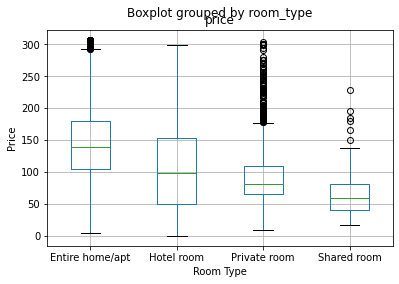

In [27]:
listings[['room_type', 'price']].boxplot(by = 'room_type')
plt.xlabel("Room Type")
plt.ylabel("Price")